In [3]:
import pickle
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from pprint import pprint

DEBUG = False

def log(msg):
    if DEBUG:
        print(msg)

with open('train.pkl', 'rb') as f:
    data = pickle.load(f)
with open('test.pkl', 'rb') as f:
    test_data = pickle.load(f)

log(test_data)
log("Data loaded")


FileNotFoundError: [Errno 2] No such file or directory: 'train.pkl'

In [ ]:
from tabulate import tabulate

random.shuffle(data)

b_array, v_array, ms_array, irr_array, bsqr = [], [], [], [], []
train_data = np.array_split(data, 16)  # divide train data into 16 parts

for degree in range(1, 16):
    # dictionary to store all the y values for every x in test data
    dict = {i[0]: [] for i in test_data}
    # log(dict)
    for data in train_data:
        frame = pd.DataFrame(data, columns = [ "Area", "Cost"] )
        X, Y = frame["Area"].values, frame["Cost"].values

        new_X = PolynomialFeatures(degree).fit_transform(X.reshape(-1, 1))
        model = LinearRegression().fit(new_X, Y)
        new_Y = model.predict(new_X)
        
        coeff_list = [model.intercept_]
        coeff_list.extend( model.coef_[1: degree + 1].tolist() )
        coeff_list.reverse()
        poly = np.poly1d(coeff_list)
        
        for i in test_data:
            dict[i[0]].append(poly(i[0]))

          # bias and variance Calculation
    bias, variance, ms, irr, bsq = 0, 0, 0, 0, 0
    # log(dict)
    for i in test_data:
        avg = sum(dict[i[0]]) / len(dict[i[0]])        
        sqr_avg = sum( (avg - j)**2 for j in dict[i[0]] ) / len(dict[i[0]])      

        variance += sqr_avg
        bias += avg-i[1]
        bsq += (avg-i[1])**2

        ## mean squared error
        tms = sum( (i[1] - j)**2 for j in dict[i[0]] ) / len(dict[i[0]])
        ms += tms
        irr += tms - sqr_avg - (avg - i[1])**2
        # print(avg, i[1])

    # print( bias, variance, ms, irr )
    
    b_array.append( bias/len(test_data) )
    v_array.append( variance/len(test_data) )
    ms_array.append( ms/len(test_data) )
    irr_array.append( irr/len(test_data) )
    bsqr.append( bsq/len(test_data) )

deg = [ i+1 for i in range(15) ]
table = list(zip(deg, b_array, v_array, ms_array))
print( tabulate( table, headers=['Degree', 'Bias', 'Variance', 'Mean Squared Error'], tablefmt="fancy_grid") )

    
log("bias, variance and MSE calculated")

NameError: name 'random' is not defined

In [ ]:
print( tabulate( list(zip(deg, irr_array)), headers=['Degree', 'Irreducible error'], tablefmt="fancy_grid"  ) )


NameError: name 'tabulate' is not defined

Text(0, 0.5, 'Error')

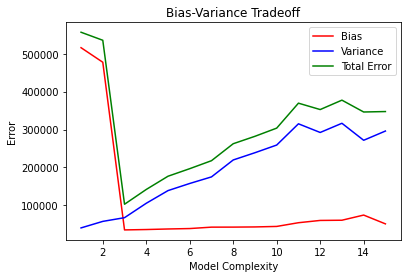

In [ ]:
import matplotlib.pyplot as plt

log(bsqr)

plt.plot(deg, bsqr, 'r', label='Bias')
plt.plot(deg, v_array, 'b', label='Variance')
plt.plot(deg, ms_array, 'g', label='Total Error')

plt.title("Bias-Variance Tradeoff")
plt.xlabel('Model Complexity')
plt.legend()
plt.ylabel('Error')